# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

A bike sharing service is the one in which a person lends bikes for other people on rent. This can sometimes be a shop where the lender receives payment for providing bikes for use. Nowadays we have an unmanned system in which bikes are available at docks which the user can go to & rent a bike & pay digitally online. In this project we are going to analyse the given dataset for valuable insights that might help the company improve their profits by analyzing various factors given in the dataset. We are also going to deploy a regtression model to predict the count of rented bikes which may include a few more steps.

# **GitHub Link -**

https://github.com/ParasChopra611/AlmaBetter/tree/main/module%206

# **Problem Statement**


Bike sharing is an important means of travelling in todays world , so its quite necessary for the bike rental services to  provide their services on time. We need to create a system which can predict Bike rental demand based on users behaviour.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [49]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Load Dataset
# mount the google drive first

df = pd.read_csv('/content/drive/MyDrive/AA AlmaBetter/Module 6 - Regression - Bike Sharing/SeoulBikeData.csv', encoding='unicode_escape')

### Dataset First View

In [52]:
# Dataset First Look

df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [53]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [54]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [55]:
# Dataset Duplicate Value Count

df.duplicated().sum()

0

#### Missing Values/Null Values

In [56]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

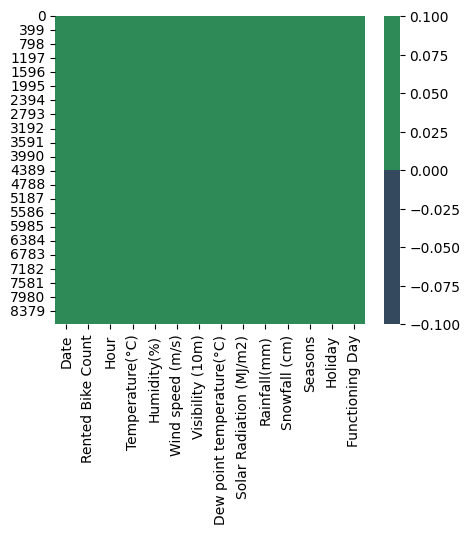

In [57]:
# Visualizing the missing values
plt.figure(figsize=(5,4))

colours = ['#34495E', 'seagreen']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

### What did you know about your dataset?

the dataset contains various information about various aspects like temprature, rainfall , snowfall etc

## ***2. Understanding Your Variables***

In [58]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [59]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [60]:
df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Variables Description

Answer Here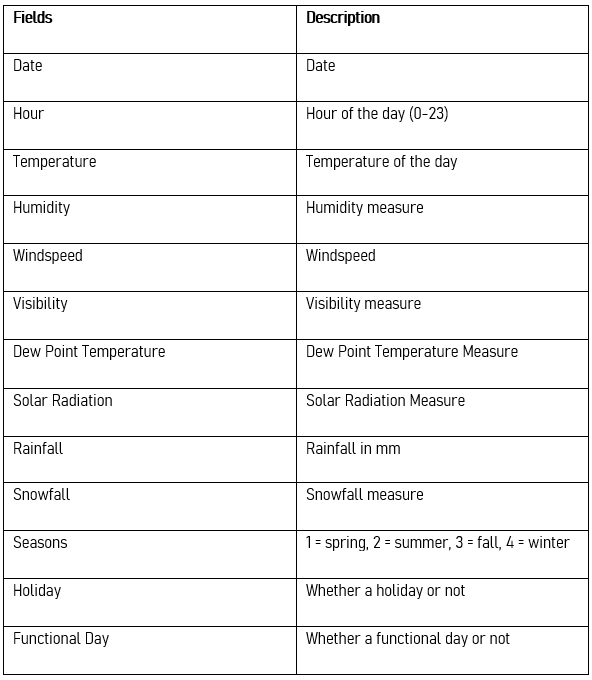

### Check Unique Values for each variable.

In [61]:
# Check Unique Values for each variable.

#no of unique vals per categorical column
for col in df.columns:
  if df[col].dtype == 'object':
    uniq = df[col].unique()

    print(f"----------Unique values in column {col} ==> {len(uniq)} --------- \n {uniq} \n\n  ")

----------Unique values in column Date ==> 365 --------- 
 ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10

## 3. ***Data Wrangling***

### Data Wrangling Code

In [62]:
# Write your code to make your dataset analysis ready.

#the date column is in format - date / month / year

#we are going to split in 3 columns - date , month , year

#then we are going to replace numerical monthly values with string values

temp = df['Date'].str.split('/', expand=True)

df['Date'] = temp[0].astype(int)
df['Month'] = temp[1]  #.astype(int)
df['Year'] = temp[2]   #.astype(int)



for i in df.index:
  if df['Month'].loc[i] == '01':
    df['Month'].loc[i] = 'Jan'

  if df['Month'].loc[i] == '02':
    df['Month'].loc[i] = 'Feb'

  if df['Month'].loc[i] == '03':
    df['Month'].loc[i] = 'Mar'

  if df['Month'].loc[i] == '04':
    df['Month'].loc[i] = 'Apr'

  if df['Month'].loc[i] == '05':
    df['Month'].loc[i] = 'May'

  if df['Month'].loc[i] == '06':
    df['Month'].loc[i] = 'June'

  if df['Month'].loc[i] == '07':
    df['Month'].loc[i] = 'July'

  if df['Month'].loc[i] == '08':
    df['Month'].loc[i] = 'Aug'

  if df['Month'].loc[i] == '09':
    df['Month'].loc[i] = 'Sep'

  if df['Month'].loc[i] == '10':
    df['Month'].loc[i] = 'Oct'

  if df['Month'].loc[i] == '11':
    df['Month'].loc[i] = 'Nov'

  if df['Month'].loc[i] == '12':
    df['Month'].loc[i] = 'Dec'

df.head(2)

<ipython-input-62-7265af3d3d9d>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'].loc[i] = 'Dec'
<ipython-input-62-7265af3d3d9d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'].loc[i] = 'Jan'
<ipython-input-62-7265af3d3d9d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'].loc[i] = 'Feb'
<ipython-input-62-7265af3d3d9d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Dec,2017
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Dec,2017


In [63]:
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Dec,2017
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Dec,2017
2,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Dec,2017


### What all manipulations have you done and insights you found?

There are 0 duplicates rows

There are 0 null values in each column

I have split the date column into 3 columns --> date, month , year

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Univariate Analysis

#### Chart - 1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   int64  
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

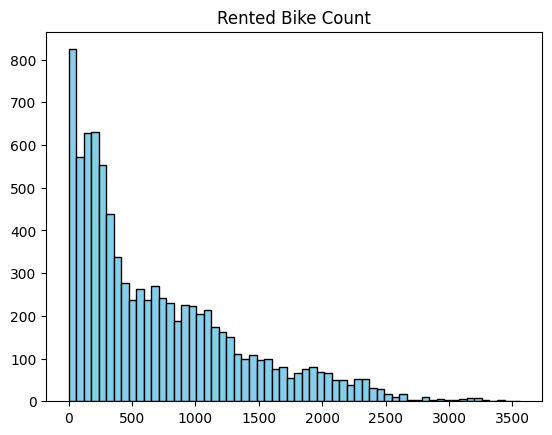

In [ ]:
# Chart - 1 visualization code

plt.hist(df['Rented Bike Count'], bins=60, color='skyblue', edgecolor='black') #


plt.title('Rented Bike Count')

plt.show()

##### 1. Why did you pick the specific chart?

Histograms are better for univarite analysis of numerical values

##### 2. What is/are the insight(s) found from the chart?

Mostly, the count of rented bikes lies between , 0 to 500

#### Chart - 2

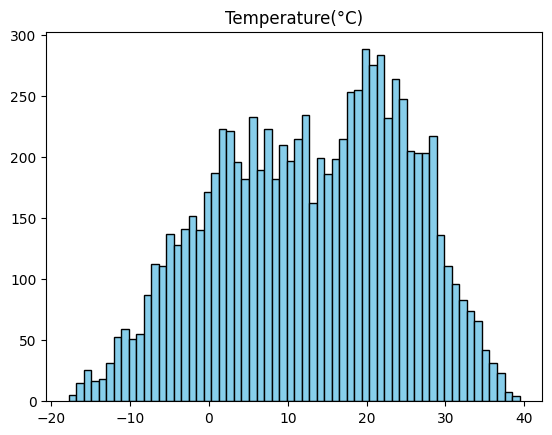

In [ ]:
# Chart - 2 visualization code


plt.hist(df['Temperature(°C)'], bins=60, color='skyblue', edgecolor='black') #


plt.title('Temperature(°C)')

plt.show()

##### 1. Why did you pick the specific chart?

Histograms are best for univariate analysis of numericaa values

##### 2. What is/are the insight(s) found from the chart?

usually the temprature lies between 0 to 30 degree celcius

#### Chart - 3

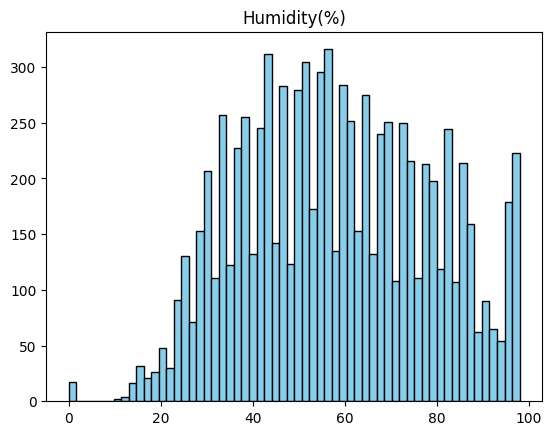

In [ ]:
# Chart - 3 visualization code

plt.hist(df['Humidity(%)'], bins=60, color='skyblue', edgecolor='black') #


plt.title('Humidity(%)')

plt.show()

##### 1. Why did you pick the specific chart?

Histograms are best for univariate analysis of numericaa values

##### 2. What is/are the insight(s) found from the chart?

mostly humidity lies between 40-80%

#### Chart - 4

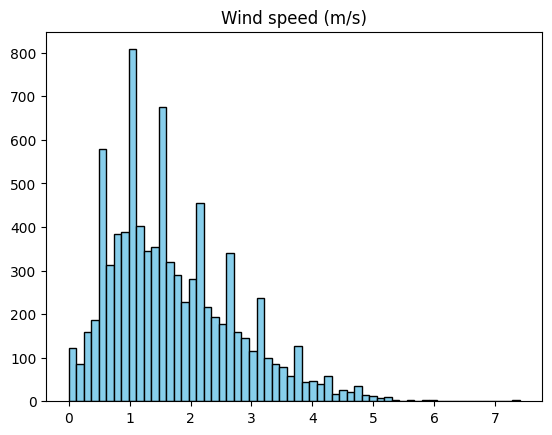

In [ ]:
# Chart - 4 visualization code


plt.hist(df['Wind speed (m/s)'], bins=60, color='skyblue', edgecolor='black') #


plt.title('Wind speed (m/s)')

plt.show()

##### 1. Why did you pick the specific chart?

Histograms are best for univariate analysis of numerical values

##### 2. What is/are the insight(s) found from the chart?

Usually the wind speed is  between 0 -2 m/s

#### Chart - 5

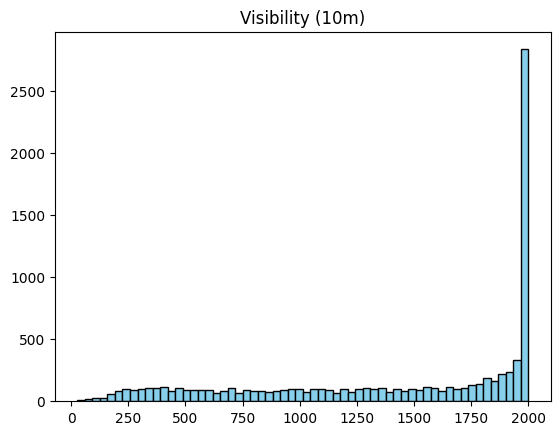

In [ ]:
# Chart - 5 visualization code


plt.hist(df['Visibility (10m)'], bins=60, color='skyblue', edgecolor='black') #


plt.title('Visibility (10m)')

plt.show()

##### 1. Why did you pick the specific chart?

Histograms are best for univariate analysis of numerical values

##### 2. What is/are the insight(s) found from the chart?

People are more likely to rent when visibility is highest at 2000

#### Chart - 6

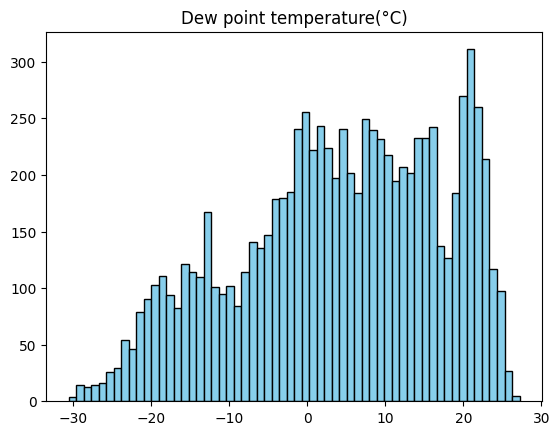

In [ ]:
# Chart - 6 visualization code



plt.hist(df['Dew point temperature(°C)'], bins=60, color='skyblue', edgecolor='black') #


plt.title('Dew point temperature(°C)')

plt.show()

##### 1. Why did you pick the specific chart?

Histograms are best for univariate analysis of numerical values

##### 2. What is/are the insight(s) found from the chart?

mostly the dew point temp range is in between -10 - 30 degree celcuis

#### Chart - 7

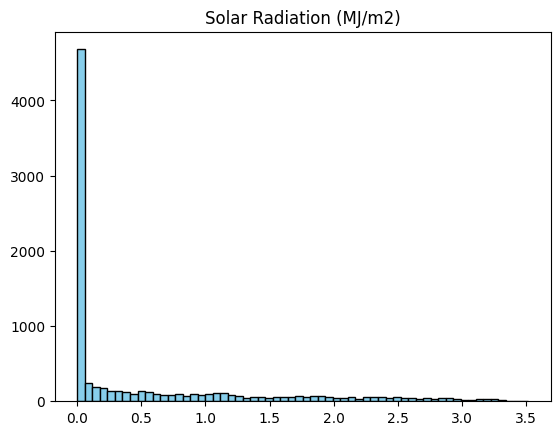

In [ ]:
# Chart - 7 visualization code


plt.hist(df['Solar Radiation (MJ/m2)'], bins=60, color='skyblue', edgecolor='black') #


plt.title('Solar Radiation (MJ/m2)')

plt.show()

##### 1. Why did you pick the specific chart?

Histograms are best for univariate analysis of numerical values

##### 2. What is/are the insight(s) found from the chart?

People prefer to rent bikes when there is least solar rediation

#### Chart - 8

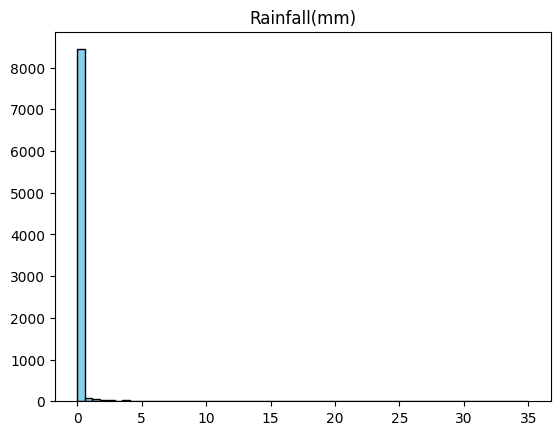

In [ ]:
# Chart - 8 visualization code
plt.hist(df['Rainfall(mm)'], bins=60, color='skyblue', edgecolor='black') #


plt.title('Rainfall(mm)')

plt.show()

##### 1. Why did you pick the specific chart?

Histograms are best for univariate analysis of numerical values

##### 2. What is/are the insight(s) found from the chart?

People prefer to rent when the rainfall is least

#### Chart - 9

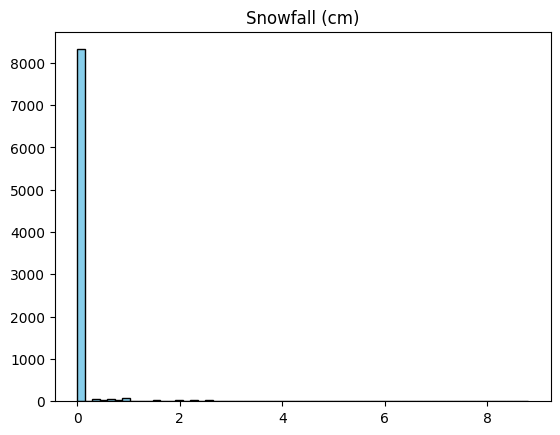

In [ ]:
# Chart - 9 visualization code

plt.hist(df['Snowfall (cm)'], bins=60, color='skyblue', edgecolor='black') #


plt.title('Snowfall (cm)')

plt.show()

##### 1. Why did you pick the specific chart?

Histograms are best for univariate analysis of numerical values

##### 2. What is/are the insight(s) found from the chart?

People prefer to rent when snowfall is least

Uivariate analysis - per each categorical column

In [ ]:
df.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Dec,2017
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Dec,2017


#### Chart - 10

Text(0.5, 1.0, 'Seasons')

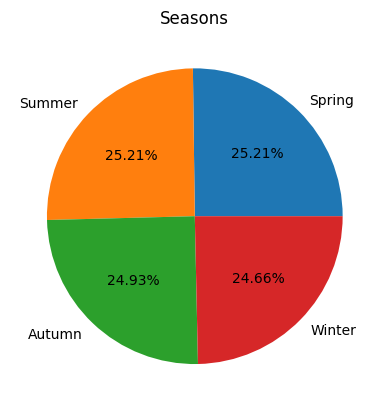

In [ ]:
# Chart - 10 visualization code

# freq distribution per categorical column

value_counts = df['Seasons'].value_counts(dropna=True, sort=True)
df_val_counts = pd.DataFrame(value_counts)

plt.pie(df_val_counts['Seasons'], labels=df_val_counts.index, autopct='%.2f%%')

plt.title('Seasons')

##### 1. Why did you pick the specific chart?

Pie chart is best to display the categorical values in the form of parts-to-whole manner

##### 2. What is/are the insight(s) found from the chart?

Winter has lowest biker rent count & summers has highest rent count, probably because days are shorter in winter & longer in summers

#### Chart - 11

Text(0.5, 1.0, 'Holiday')

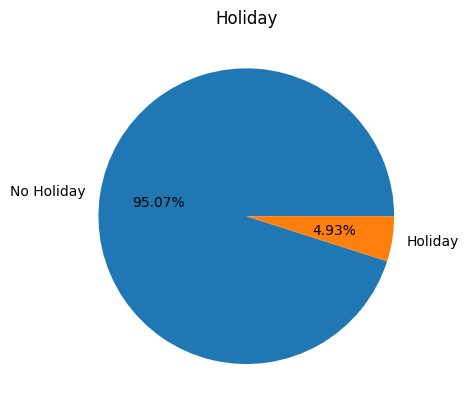

In [ ]:
# Chart - 11 visualization code



# freq distribution per categorical column

value_counts = df['Holiday'].value_counts(dropna=True, sort=True)
df_val_counts = pd.DataFrame(value_counts)

plt.pie(df_val_counts['Holiday'], labels=df_val_counts.index, autopct='%.2f%%')

plt.title('Holiday')

##### 1. Why did you pick the specific chart?

Pie chart is best to display the categorical values in the form of parts-to-whole manner

##### 2. What is/are the insight(s) found from the chart?

theres more demand for bikes when there is no holidays

#### Chart - 12

Text(0.5, 1.0, 'Year')

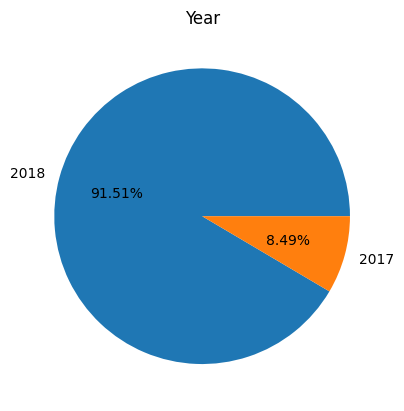

In [ ]:
# Chart - 12 visualization code
# freq distribution per categorical column

value_counts = df['Year'].value_counts(dropna=True, sort=True)
df_val_counts = pd.DataFrame(value_counts)

plt.pie(df_val_counts['Year'], labels=df_val_counts.index, autopct='%.2f%%')

plt.title('Year')

##### 1. Why did you pick the specific chart?

Pie chart is best to display the categorical values in the form of parts-to-whole manner

##### 2. What is/are the insight(s) found from the chart?

2018 was busier than 2017 when it comes to bike demand

#### Chart - 13

Bivariate analysis - Total Bike Rent Count per column

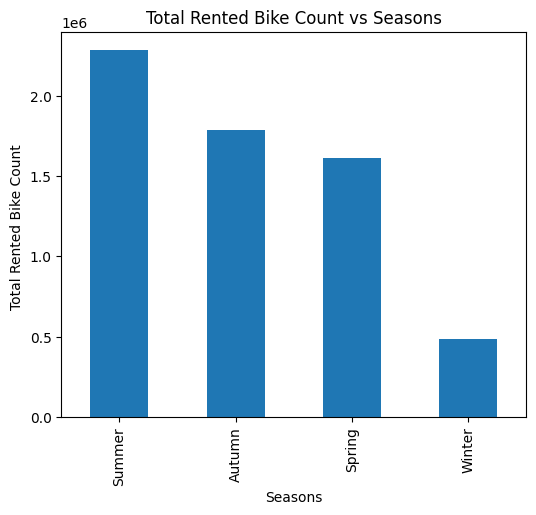

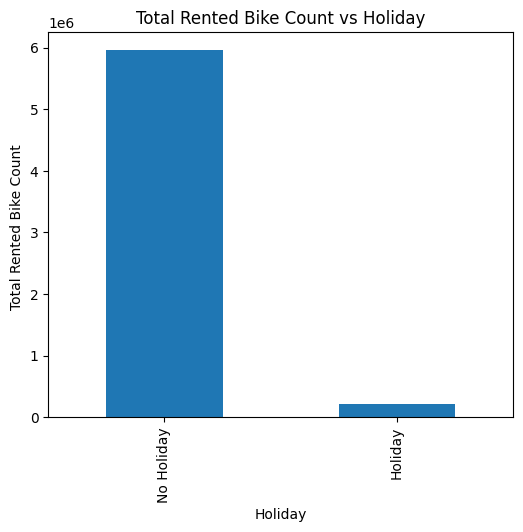

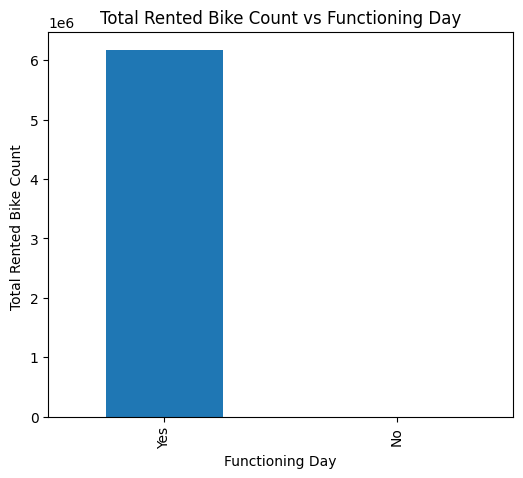

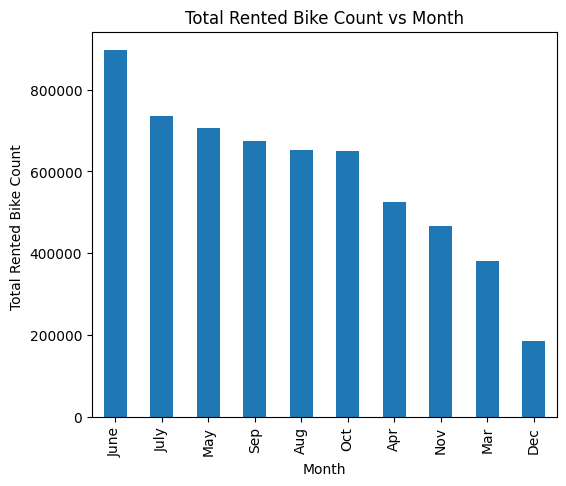

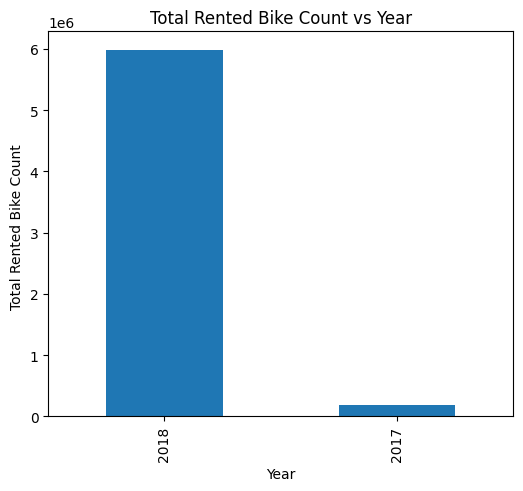

In [ ]:
# Chart - 13 visualization code
for col in df.columns:
  if df[col].dtype == 'object':
    temp = df.groupby([col])['Rented Bike Count'].sum().nlargest(10)
    temp.plot(kind='bar', title=f'Total Rented Bike Count vs {col}', ylabel='Total Rented Bike Count ',
         xlabel=col, figsize=(6, 5))
    # Display the plot
    plt.show()

##### 1. Why did you pick the specific chart?

Bar chart are the best for bivariate analysis when you want to compare categorical values

##### 2. What is/are the insight(s) found from the chart?

summer has more demand than any other seasons

Theres more demand when there is no holiday

Functioning days has more demands than non functioning days

June, july, may has highest demand tahn other months, probably because these are summer months when days are longer

2018 has seen more demand than 2017

#### Chart - 14 - Correlation Heatmap

<ipython-input-32-146c53596739>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = df.corr()


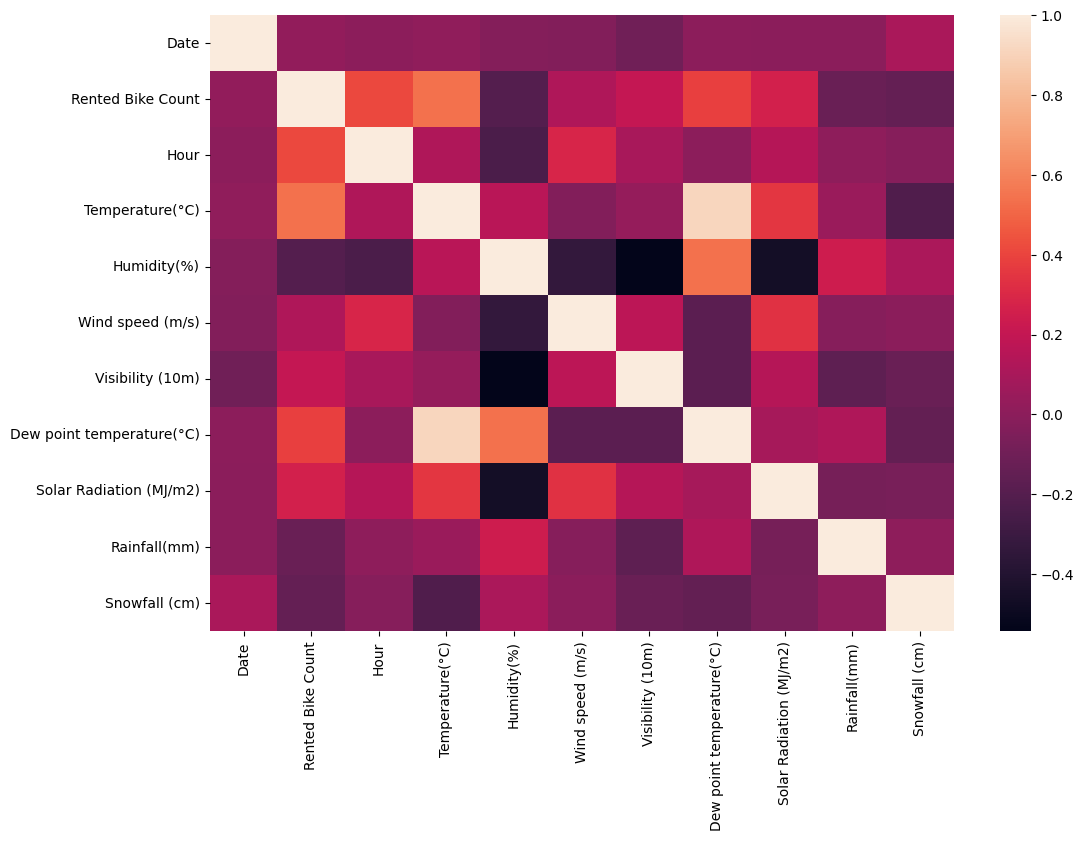

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,8))
corelation = df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=False, linewidths=0)
plt.show()

##### 1. Why did you pick the specific chart?

correlation heatmaps are the best way to find correlations between variables in a graphical manner which is more digestible to general audience

##### 2. What is/are the insight(s) found from the chart?

there seems to be som elevel of correlation between rented bike count & Solar radiation , Dew pt temp , Visibility , Temprature , Hour

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

Pairplot is the best in giving us a more summarised way of looking at the graph

##### 2. What is/are the insight(s) found from the chart?

There seems to be some level of collinearity & correlation between variables

## ***7. ML Model Implementation***

## Encoding of categorical columns, dummy encoding

In [ ]:
df_dum = pd.get_dummies(df)

df_dum.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Year_2017,Year_2018
0,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_dum.columns , len(df_dum.columns)

(Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
        'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
        'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
        'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
        'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
        'Functioning Day_Yes', 'Month_Apr', 'Month_Aug', 'Month_Dec',
        'Month_Feb', 'Month_Jan', 'Month_July', 'Month_June', 'Month_Mar',
        'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'Year_2017',
        'Year_2018'],
       dtype='object'),
 33)

What all categorical encoding techniques have you used & why did you use those techniques?

Since the machine learning models cannot work on categorical values directly , we need to convert these values into numerical values . This is why categorical encoding is required.

## Defining x & y, then train test split

In [ ]:
x = df_dum.drop(['Rented Bike Count'], axis = 1)

y = df_dum['Rented Bike Count']

In [ ]:
x.shape , y.shape

((8760, 32), (8760,))

## train test split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### ML Models

We used the following ml algorithms

linear regression

ridge regression

lasso regression

support vector regression

decision tree regressor

random forest regressor

xgboost regressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn import linear_model #lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg


lr = LinearRegression()
pr = PolynomialFeatures() #degree=2, include_bias=False
rr = Ridge() #alpha=1.0
lar =  linear_model.Lasso() #alpha=0.1
svr = SVR() #C=1.0, epsilon=0.2
dtr =  DecisionTreeRegressor() # random_state=0
rfr = RandomForestRegressor() #max_depth=2, random_state=0
xgbr = xg.XGBRegressor()  #objective ='reg:linear', n_estimators = 10, seed = 123


In [ ]:
# ML Model  Implementation
list_of_regressors = [
    lr,

    rr,
    lar,
    svr,
    dtr,
    rfr,
    xgbr
]

from sklearn.metrics import r2_score
# Fit the Algorithm
#train_scores = []
#test_scores = []
model_train_test_r2_list = []

for regressor in list_of_regressors:
  regressor.fit(x_train,y_train)

  y_pred_train = regressor.predict(x_train) # predicting on training data to find score on training data
  y_pred_test = regressor.predict(x_test) # predicting on testing data to find score on testing data

  train_sc = r2_score(y_train, y_pred_train)
  test_sc = r2_score(y_test, y_pred_test)

  model_train_test_r2_list.append([regressor , train_sc , test_sc])





In [ ]:
model_eval_df = pd.DataFrame(model_train_test_r2_list)
model_eval_df.columns = ['regressor' , 'train_sc' , 'test_sc']

In [ ]:
model_eval_df

,regressor,train_sc,test_sc
0,LinearRegression(),0.593731,0.573092
1,Ridge(),0.593730,0.573123
2,Lasso(),0.593147,0.572377
3,SVR(),-0.045296,-0.051177
4,DecisionTreeRegressor(),1.000000,0.738226
5,"(DecisionTreeRegressor(max_features=1.0, rando...",0.983747,0.871077
6,"XGBRegressor(base_score=None, booster=None, ca...",0.976386,0.886134


We can see that xgboost regressor works the best , though random forest regressor is a close second

Descision tree is overfitted [good score on training data but bad score on testing data]

and the rest are just very bad

## Hyperparameter Tuning

randomisedsearch cv

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time

In [ ]:
# Number of trees
n_estimators = list(range(100 , 1300 , 100)) # same as prev algo

# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']

# Maximum number of levels in tree
max_depth = list(range(5 , 31 , 6))

#Subssample parameter values
subsample=[0.7,0.6,0.8]

# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 11, 17, 23, 29], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [ ]:

xgbr_random = RandomizedSearchCV(estimator = xgbr, param_distributions = random_grid,scoring='r2', n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = 1)

xgbr_random.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END learning_rate=0.05, max_depth=29, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=  10.1s
[CV] END learning_rate=0.05, max_depth=29, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=   9.4s
[CV] END learning_rate=0.6, max_depth=29, min_child_weight=7, n_estimators=900, subsample=0.8; total time=   1.8s
[CV] END learning_rate=0.6, max_depth=29, min_child_weight=7, n_estimators=900, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.6, max_depth=29, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.6, max_depth=29, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   2.9s
[CV] END learning_rate=0.6, max_depth=23, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   1.4s
[CV] END learning_rate=0.6, max_depth=23, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   1.6s
[CV] END learning_rate=

RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 11, 17, 23, 29],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='r2', verbose=2)

In [ ]:
xgbr_random.best_score_ # r2 score

0.8860230434691163

In [ ]:
xgbr_random.best_params_

{'subsample': 0.6,
 'n_estimators': 1200,
 'min_child_weight': 5,
 'max_depth': 17,
 'learning_rate': '0.05'}

In [ ]:
predictions=xgbr_random.predict(x_test)

##### Which hyperparameter optimization technique have you used and why?

I used Randomised search cv because it is faster

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Not much improvement

#### 2. Cross- Validation & Hyperparameter Tuning

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I used R2 score because it is easier to interpret.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I used Xgboost regressor because it has the best performance

# **Conclusion**

We have created a machine learning that predicts the bike demand as per given variables in the dataset. this model can be used to increase productiivity & profits of the bike sharing businesses

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***